<i> This notebook contains attempted solutions for the questions posed in HW1. </i>


 <i> Solution for Q1.</i>

Here in the code snippet below, we write the functions required to produce and play the wave files as asked for in the question (REMEMBER TO adJUST this statement, according to what you actually do !!).

In [1]:
# Importing required libraries
import wave
import numpy as np
import matplotlib.pyplot as plt
import pyaudio as pyd

def readWavFile(wavFilename):

    # Reading the .wav file.
    wav = wave.open(wavFilename, 'rb')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = wav_len/sample_rate
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.arange(0, duration, 1/sample_rate)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(wav_len)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = amplitude1.tolist()
    
    wav.close()
    # Returning the amplitude list and sample_points list. CHANGE THIS!!
    return amplitude, sample_rate


def CreateWavFile(wavFilename, amplitude, req_sample_rate):
    
    wav = wave.open(wavFilename, 'wb')
    
    wav.setnchannels(1)
    
    wav.setsampwidth(1)
    
    wav.setframerate(req_sample_rate)
    
    wav.writeframes(amplitude)
    
    wav.close()
  


def PlayWaveFile(wavFilename):
    
    wav = wave.open(wavFilename, 'rb')
    playFile = pyd.PyAudio()
    
    CHUNK = 1024
    
    stream = playFile.open(format=playFile.get_format_from_width(wav.getsampwidth()),
                channels=wav.getnchannels(),
                rate=wav.getframerate(),
                output=True)
    
    data = wav.readframes(CHUNK)

    while len(data) > 0:
        stream.write(data)
        data = wav.readframes(CHUNK)

   
    stream.stop_stream()
    stream.close()

    playFile.terminate()
    
    wav.close()
    
   
    
    


# Asking for user input for wav file name.
wavFile = input("Enter the .wav file you wish to hear:")
factor = float(input("At what factor of the original frequency would you like to hear it ?"))
# Calling the readWavFile() to obtain the required parameters.Change

amplitude, sample_rate = readWavFile(wavFile)

CreateWavFile(str(factor) + "fs_" + wavFile, amplitude, factor*sample_rate)

PlayWaveFile(wavFile)
        

ModuleNotFoundError: No module named 'pyaudio'

Tell observations.

Q2.(b) as mentioned, this is from last time's group

Plots for 2.0fs_alarm.wav  :-


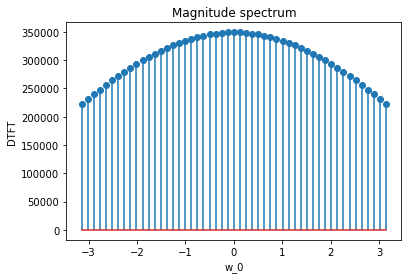

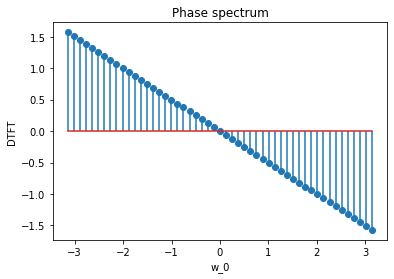

Plots for 1.0fs_alarm.wav (original) :-


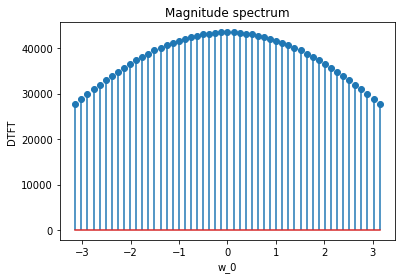

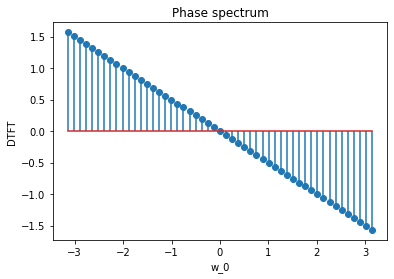

Plots for 0.5fs_alarm.wav  :-


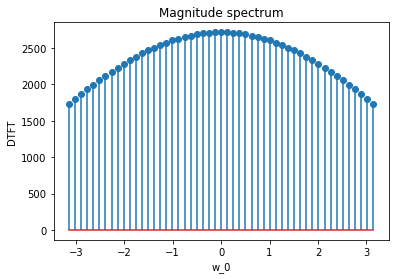

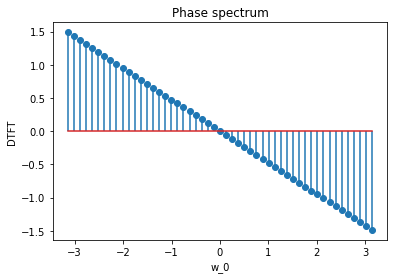

Plots for 0.25fs_alarm.wav  :-


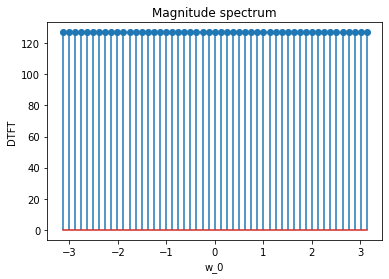

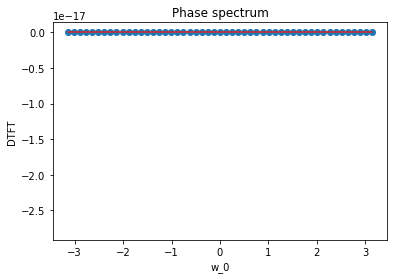

Plots for 2.0fs_armageddon.wav  :-


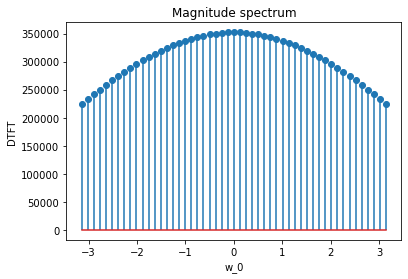

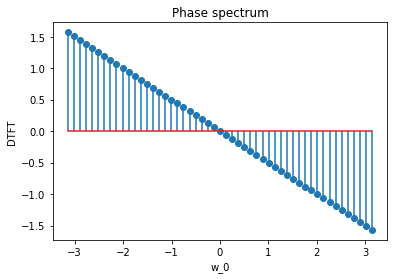

Plots for 1.0fs_armageddon.wav (original) :-


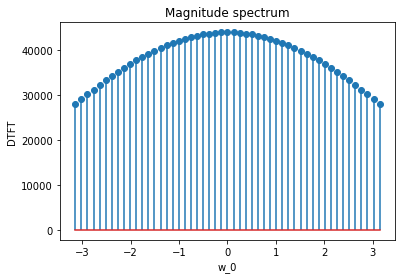

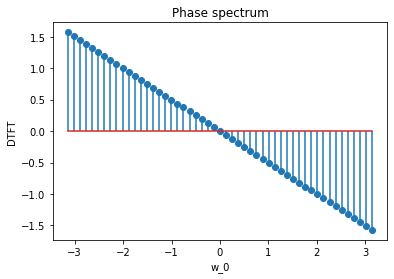

Plots for 0.5fs_armageddon.wav  :-


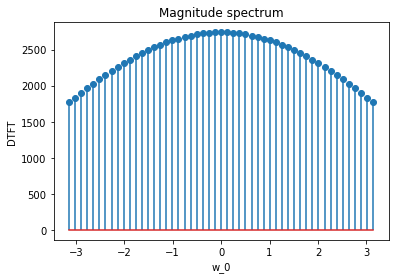

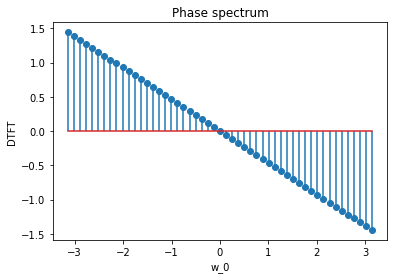

Plots for 0.25fs_armageddon.wav  :-


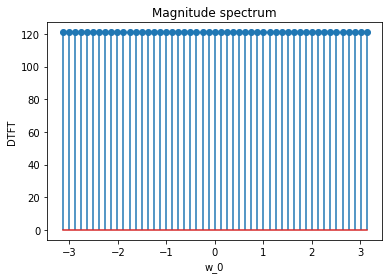

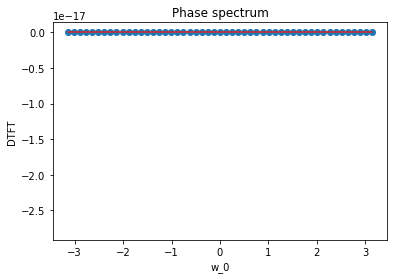

Plots for 2.0fs_cry.wav  :-


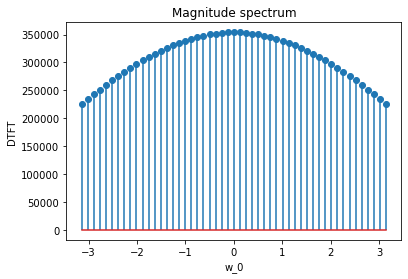

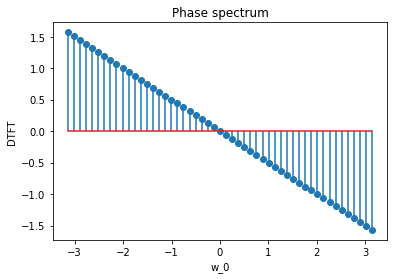

Plots for 1.0fs_cry.wav (original) :-


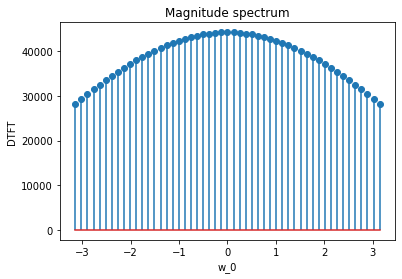

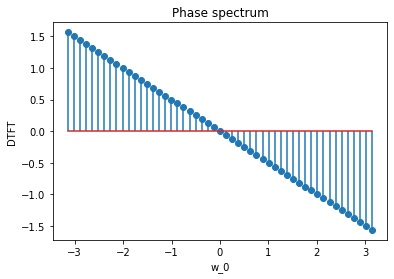

Plots for 0.5fs_cry.wav  :-


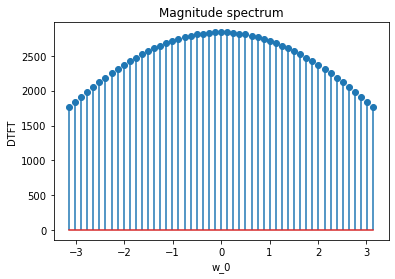

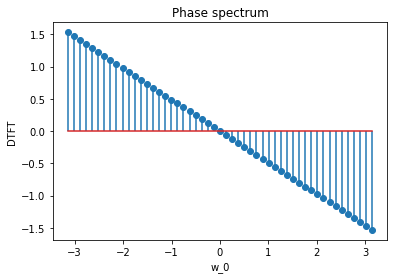

Plots for 0.25fs_cry.wav  :-


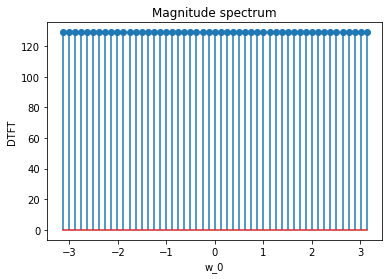

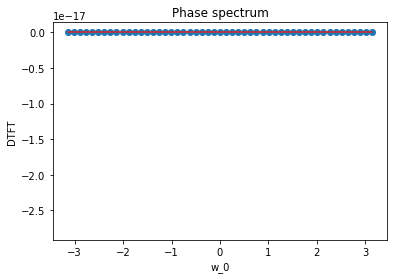

Plots for 2.0fs_wow.wav  :-


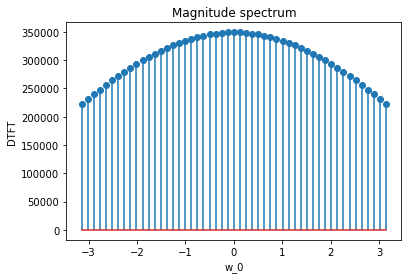

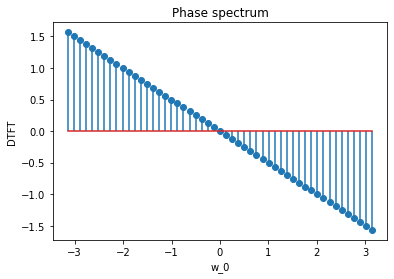

Plots for 1.0fs_wow.wav (original) :-


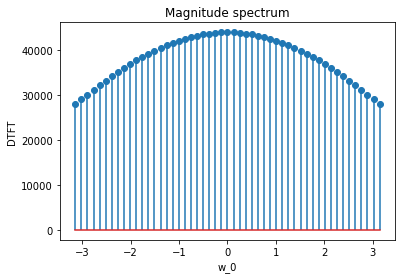

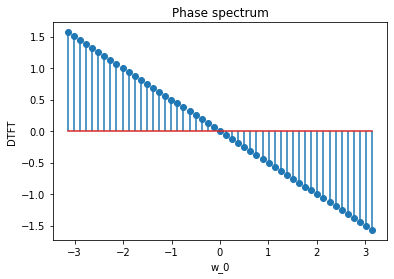

Plots for 0.5fs_wow.wav  :-


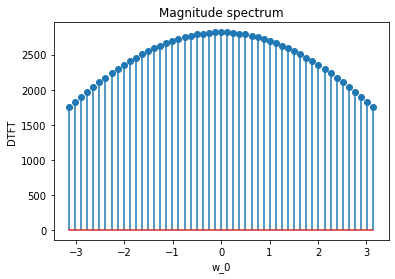

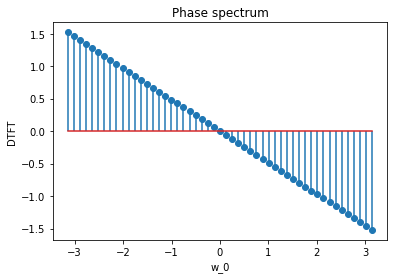

Plots for 0.25fs_wow.wav  :-


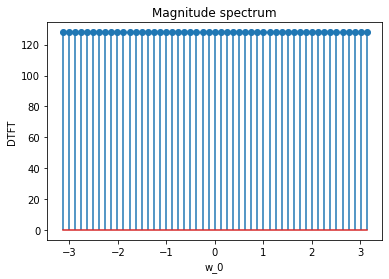

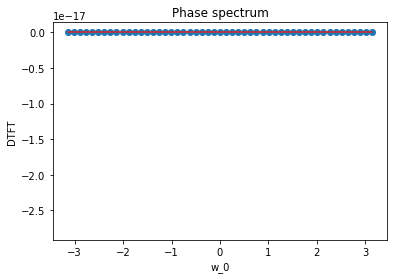

In [108]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pyaudio as pyd

# The implementation of the mathematical formulation of DTFT in the code snippet below.
def DTFT(X, Y, w):
    
    sum = 0
    for counter in range(len(X)):
        sum += Y[counter] * (np.exp(-1j*w*X[counter]))
    
    magnitude = np.sqrt((sum.real**2) + (sum.imag**2))
    phase = np.angle(sum)
    
    return magnitude, phase




def DTFT_plot(X, Y, wavFilename):
    
    magnitude = []
    phase = []

    w_0Array = np.linspace((np.pi * -1), np.pi, 51) # An odd partition should be kept in order to ensure that 0 is covered.
    w_0Array = w_0Array.tolist()

        
    for w_0 in w_0Array:
        m,p = DTFT(X,Y,w_0)
        magnitude.append(m)
        phase.append(p)
        
    # Stem - plots.
    if wavFilename[0] == '1':
        print("Plots for", wavFilename,"(original) :-")
    else:
        print("Plots for", wavFilename," :-")
    
    plt.stem(w_0Array, magnitude)
    plt.xlabel('w_0')
    plt.ylabel('DTFT')
    plt.title("Magnitude spectrum")
    plt.show()
    
    plt.stem(w_0Array, phase)
    plt.xlabel('w_0')
    plt.ylabel('DTFT')
    plt.title("Phase spectrum")
    plt.show()




def CreateWavFile(wavFilename, amplitude, req_sample_rate):
    
    wav = wave.open(wavFilename, 'wb')
    
    wav.setnchannels(1)
    
    wav.setsampwidth(1)
    
    wav.setframerate(req_sample_rate)
    
    wav.writeframes(amplitude)
    
    wav.close()



def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'rb')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
    duration = 1
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.arange(0, duration, 1/sample_rate)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(int(duration*sample_rate)+1)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = amplitude1.tolist()
    
    # Returning the amplitude list and sample_points list.chnage
    return amp2, sample_points, sample_rate





wavFiles = ["alarm.wav", "armageddon.wav", "cry.wav", "wow.wav"]
factor = [2.0, 1.0, 0.5, 0.25]


for name in wavFiles:
    amplitude, sample_points, sample_rate = readWavFile(name)
    
    for num in factor:
        amplitude = np.array(amplitude)
        amplitude = amplitude.tobytes()
        CreateWavFile(str(num) + "fs_" + name, amplitude, int(num*sample_rate))
        amplitude, sample_points, sample_rate = readWavFile(str(num) + "fs_" + name)
        DTFT_plot(sample_points, amplitude, str(num) + "fs_" + name)
        





<i> Solution for Q2. </i>

The following code contains the primary function which returns the linearly convoluted signal of two input sequences.

<i> <u> Note </u> : in accordance to the question's statements, it is assumed that none of the input signals have a non - zero value at a negative index. </i>

In [19]:
import matplotlib.pyplot as plt

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    #AlSO  wE ARE assuming 
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
                
             
    # Printing the input and output sequences.
    
    print("The first input signal X, is given by the following sequence:")
    print(X)
        
    print("The second input signal H, is given by the following sequence:")
    print(H)
        
    print("The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:")
    print(Y)  
    
    # Plotting the input and output sequences (stem plots).
    
    plt.stem(range(Xsize), X)
    plt.xlabel('n')
    plt.ylabel('X[n]')
    plt.title('Input signal X')
    plt.show()
    
    plt.stem(range(Hsize), H)
    plt.xlabel('n')
    plt.ylabel('H[n]')
    plt.title('Input signal H')
    plt.show()
    
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Output signal Y = X*H') # '*' here denotes convolution.
    plt.show()
    


Test of function linearConvolution on Q2.(a).

The first input signal X, is given by the following sequence:
[1, 1, 1, 1, 1, 1]
The second input signal H, is given by the following sequence:
[1]
The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:
[1, 1, 1, 1, 1, 1]


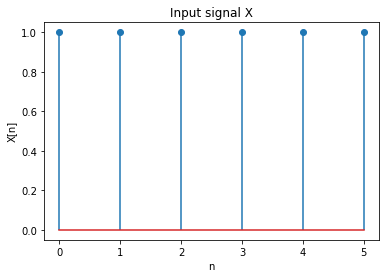

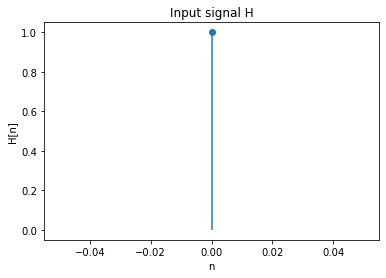

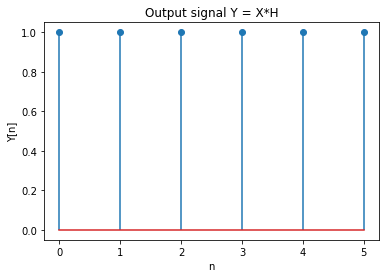

In [8]:
import matplotlib.pyplot as plt

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
                
             
    # Printing the input and output sequences.
    
    print("The first input signal X, is given by the following sequence:")
    print(X)
        
    print("The second input signal H, is given by the following sequence:")
    print(H)
        
    print("The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:")
    print(Y)  
    
    # Plotting the input and output sequences (stem plots).
    
    plt.stem(range(Xsize), X)
    plt.xlabel('n')
    plt.ylabel('X[n]')
    plt.title('Input signal X')
    plt.show()
    
    plt.stem(range(Hsize), H)
    plt.xlabel('n')
    plt.ylabel('H[n]')
    plt.title('Input signal H')
    plt.show()
    
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Output signal Y = X*H') # '*' here denotes convolution.
    plt.show()
    

# Producing the required signals for testing, as mentioned in Q2.(a).

x = []
h = []

for index in range(6):
    x.append(1)
    
for index in range(1):
    h.append(1)
    
linearConvolution(x, h) # Testing.
    


Test of function linearConvolution on Q2.(b).

The first input signal X, is given by the following sequence:
[1, 1, 1, 1, 1, 1]
The second input signal H, is given by the following sequence:
[1, 1, 1, 1, 1, 1]
The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:
[1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]


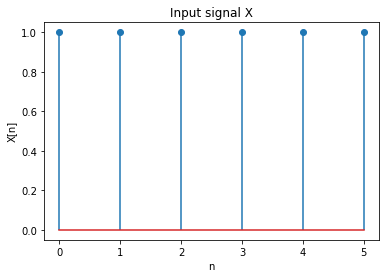

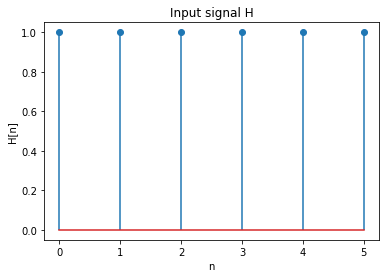

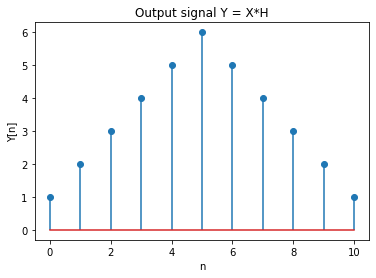

In [9]:
import matplotlib.pyplot as plt

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
                
             
    # Printing the input and output sequences.
    
    print("The first input signal X, is given by the following sequence:")
    print(X)
        
    print("The second input signal H, is given by the following sequence:")
    print(H)
        
    print("The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:")
    print(Y)   
    
    # Plotting the input and output sequences (stem plots).
    
    plt.stem(range(Xsize), X)
    plt.xlabel('n')
    plt.ylabel('X[n]')
    plt.title('Input signal X')
    plt.show()
    
    plt.stem(range(Hsize), H)
    plt.xlabel('n')
    plt.ylabel('H[n]')
    plt.title('Input signal H')
    plt.show()
    
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Output signal Y = X*H') # '*' here denotes convolution.
    plt.show()
    

# Producing the required signals for testing, as mentioned in Q2.(a).

x = []

for index in range(6):
    x.append(1)
    
linearConvolution(x, x) # Testing.
    


In [ ]:
Test of function linearConvolution on Q2.(c).

The first input signal X, is given by the following sequence:
[0, 1, 2, 3, 4, 5]
The second input signal H, is given by the following sequence:
[0, 1, 2, 3, 4, 5]
The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:
[0, 0, 1, 4, 10, 20, 35, 44, 46, 40, 25]


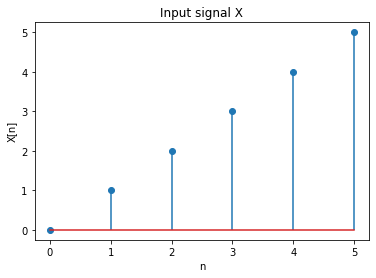

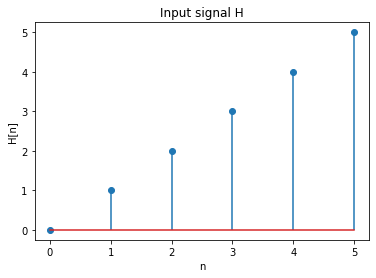

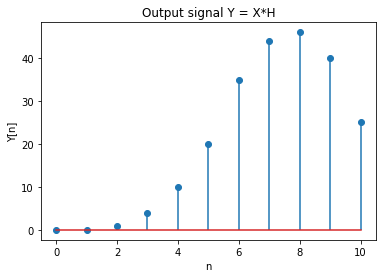

In [10]:
import matplotlib.pyplot as plt

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
                
             
    # Printing the input and output sequences.
    
    print("The first input signal X, is given by the following sequence:")
    print(X)
        
    print("The second input signal H, is given by the following sequence:")
    print(H)
        
    print("The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:")
    print(Y)   
    
    # Plotting the input and output sequences (stem plots).
    
    plt.stem(range(Xsize), X)
    plt.xlabel('n')
    plt.ylabel('X[n]')
    plt.title('Input signal X')
    plt.show()
    
    plt.stem(range(Hsize), H)
    plt.xlabel('n')
    plt.ylabel('H[n]')
    plt.title('Input signal H')
    plt.show()
    
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Output signal Y = X*H') # '*' here denotes convolution.
    plt.show()
    

# Producing the required signals for testing, as mentioned in Q2.(a).

x = []

for index in range(6):
    x.append(index)
    
linearConvolution(x, x) # Testing.
    


In [ ]:
Test of function linearConvolution on Q2.(d).

The first input signal X, is given by the following sequence:
[1, 1, 1, 1, 1, 1]
The second input signal H, is given by the following sequence:
[0.5, -0.5]
The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5]


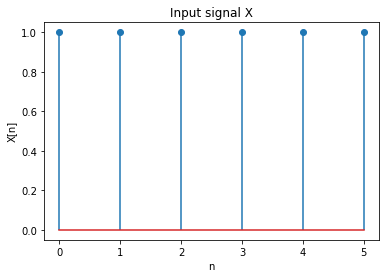

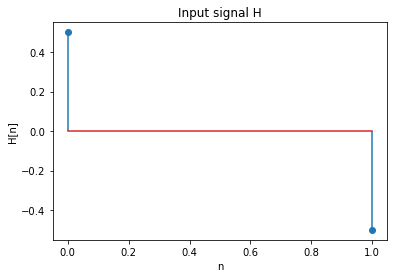

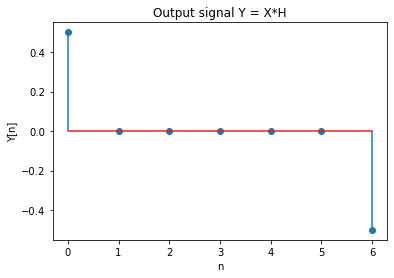

In [11]:
import matplotlib.pyplot as plt

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
                
             
    # Printing the input and output sequences.
    
    print("The first input signal X, is given by the following sequence:")
    print(X)
        
    print("The second input signal H, is given by the following sequence:")
    print(H)
        
    print("The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:")
    print(Y)   
    
    # Plotting the input and output sequences (stem plots).
    
    plt.stem(range(Xsize), X)
    plt.xlabel('n')
    plt.ylabel('X[n]')
    plt.title('Input signal X')
    plt.show()
    
    plt.stem(range(Hsize), H)
    plt.xlabel('n')
    plt.ylabel('H[n]')
    plt.title('Input signal H')
    plt.show()
    
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Output signal Y = X*H') # '*' here denotes convolution.
    plt.show()
    

# Producing the required signals for testing, as mentioned in Q2.(a).

x = []
h = []

for index in range(6):
    x.append(1)
    
h.append(0.5)
h.append(-0.5)
    
linearConvolution(x, h) # Testing.
    


In [ ]:
Test of function linearConvolution on Q2.(e).

The first input signal X, is given by the following sequence:
[1.0, -1.0, 1.0, -1.0, 1.0, -1.0]
The second input signal H, is given by the following sequence:
[0.5, 0.5]
The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5]


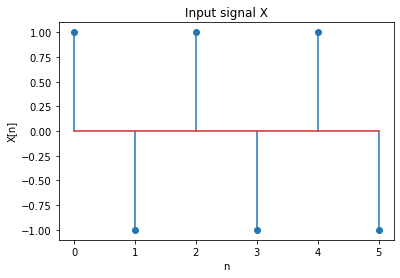

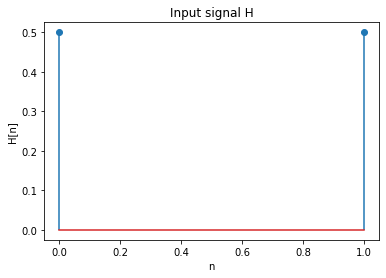

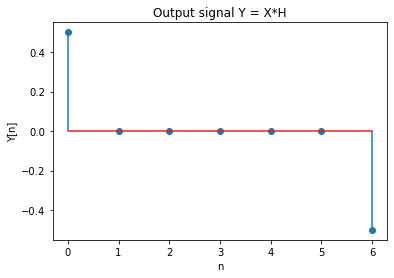

In [118]:
import matplotlib.pyplot as plt
import numpy as np

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
                
             
    # Printing the input and output sequences.
    
    print("The first input signal X, is given by the following sequence:")
    print(X)
        
    print("The second input signal H, is given by the following sequence:")
    print(H)
        
    print("The linearly convoluted signal of the above 2 input sequences Y, is given by the following sequence:")
    print(Y)   
    
    # Plotting the input and output sequences (stem plots).
    
    plt.stem(range(Xsize), X)
    plt.xlabel('n')
    plt.ylabel('X[n]')
    plt.title('Input signal X')
    plt.show()
    
    plt.stem(range(Hsize), H)
    plt.xlabel('n')
    plt.ylabel('H[n]')
    plt.title('Input signal H')
    plt.show()
    
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Output signal Y = X*H') # '*' here denotes convolution.
    plt.show()
    

# Producing the required signals for testing, as mentioned in Q2.(a).

x = []
h = []

for index in range(6):
    x.append(np.cos(index*np.pi))
    
h.append(0.5)
h.append(0.5)
    
linearConvolution(x, h) # Testing.



Solution for Q3.

The primary set of functions required for performing the tasks for an arbitrary pair of a wave file and another input signal are shown in the code snippet below.
The demonstrations are done in the code blocks that follow immediately after this one.

<i><u>Note </u>: The function, readWavFile() is almost totally, the outcome of our solution to Q5 of HW0 (Group - 44). </i>

In [ ]:
Q3.a.

In [3]:
#question 3a 

import numpy as np
import matplotlib.pyplot as plt 
import wave
import playsound as psd

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0.0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
                
    Y = np.array(Y)
    Y.tobytes()
    return Y
                
    
def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'rb')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.
     # CHANGE TO 1, MAKE SURE IT ACTUALLY WORKS

    duration = 1
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.arange(0, duration, 1/sample_rate)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(duration*sample_rate)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = amplitude1.tolist()
    
    # Returning the amplitude list and sample_points list.
    return amp2, sample_rate


def CreateWavFile(wavFilename, amplitude, req_sample_rate):
    
    wav = wave.open(wavFilename, 'wb')
    
    wav.setnchannels(1)
    
    wav.setsampwidth(1)
    
    wav.setframerate(req_sample_rate)
    
    wav.writeframes(amplitude)
    
    wav.close()
    

    

def delta(d):
    
    # x[i] is 1 only if i == d and 0 otherwise.
    # Here d is a single number (equal to the amount by which the delta signal has been shifted).
    x = [1 if i in d else 0 for i in range(0,3)] 
        
    return x 

n  = [0]
n1 = [1]
n2 = [2]

xn   = delta(n)
xn1  = delta(n1)
xn2  = delta(n2)

h=[]

for i in range(0,3):
        value = float(xn[i] + xn1[i] + xn2[i])
        valuef = value*0.33
       
        h.append(valuef)

# Asking the user to input the .wav file name.
wavFile = input("Enter the .wav file you want to plot:")

# Calling the readWavFile() to obtain the amplitude
amp, sample_rate = readWavFile(wavFile)

CreateWavFile("Convolved_" + wavFile, linearConvolution(amp, h), sample_rate)

psd.playsound(wavFile)

ModuleNotFoundError: No module named 'playsound'

Q3.b

Enter the .wav file you want to plot:alarm.wav


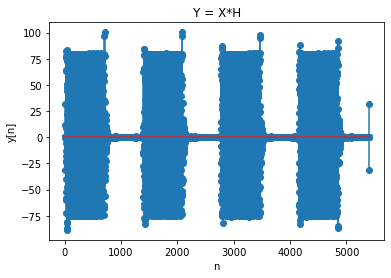

In [116]:
#question 3b 

import numpy as np
import matplotlib.pyplot as plt 
import wave
import playsound as psd

def linearConvolution(X, H):
    
    # 0 - based indexing.
    Xsize = len(X)
    Hsize = len(H)
    
    # The size of the linearly convoluted signal of X and H woud be len(X) + len(H) - 1, by virtue of the width property
    # of convolution.
    
    Y = []
    
    
    for indY in range(Xsize + Hsize - 1):
        curr_sum = 0
        for indX in range(Xsize):
            if (indY - indX) >= 0 and (indY - indX) < Hsize :
                curr_sum += (X[indX]*H[indY-indX])
        Y.append(curr_sum)
        
        
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('y[n]')
    plt.title('Y = X*H')
    plt.show()
    
                
    Y = np.array(Y)
    Y.tobytes()
    return Y
    


def readWavFile(wavFile):

    # Reading the .wav file.
    wav = wave.open(wavFile, 'rb')
    
    # Acquiring the sample frequency from the audio file.
    sample_rate = wav.getframerate() 
    
    # Acquiring the number of samples from the audio file.
    wav_len = wav.getnframes()
    
    # Duration of the audio file is obtained by dividing the number of samples with the sample frequency.CHNGAE!
    duration = 1
    
    # This numpy array stores regularly spaced time intervals, the width of each time-interval being 1/(sample frequency).
    sample_points1 = np.arange(0, duration, 1/sample_rate)
    
    # Converting the numpy array to list
    sample_points = sample_points1.tolist()
    
    # This variable stores the byte object which stores the amplitude information of each audio frame.
    amplitude = wav.readframes(duration*sample_rate)
    
    # Decoding the byte object to numpy array.
    amplitude1 = np.frombuffer(amplitude, dtype=np.uint8)
    
    # Converting numpy array to list.
    amp2 = amplitude1.tolist()
    
    # Returning the amplitude list and sample_points list. CHANGE!
    return amp2, sample_rate


def CreateWavFile(wavFilename, amplitude, req_sample_rate):
    
    wav = wave.open(wavFilename, 'wb')
    
    wav.setnchannels(1)
    
    wav.setsampwidth(1)
    
    wav.setframerate(req_sample_rate)
    
    wav.writeframes(amplitude)
    
    wav.close()
    
    


h = [-0.25, 0.5, -0.25]

#Asking for user input for wav file name
wavFile = input("Enter the .wav file you want to plot:")

# Calling the readWavFile() to obtain the amplitude
amp, sample_rate = readWavFile(wavFile)

CreateWavFile("Convolved_" + wavFile, linearConvolution(amp, h), sample_rate)

psd.playsound("Convolved_" + wavFile)